In [1]:
!pip install plotly -qqq
!pip install seaborn -qqq

In [2]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ast import literal_eval

In [3]:
data_path = '/kaggle/input/trendyol-product-dataset/prepared_all_products.csv'
data = pd.read_csv(data_path)

In [4]:
def get_merchant_product_count(merchant_name):
    
    merchant = data[data['merchant_name'] == merchant_name]
    count = merchant.shape[0]
    
    return count

In [6]:
data['merchant_product_count'] = data['merchant_name'].apply(lambda x: get_merchant_product_count(x))

data = data[data['merchant_product_count'] > 3]
data = data[data['average_rating'] > 0.0]
data = data[data['price'] > 0.0]

In [7]:
#literal eval for dict columns

def evaled(x):
    try:
        return literal_eval(str(x))
    except:
        pass

eval_cats = ['categories', 'ratings_summary', 'comments', 'questions_answers', 'Metadata']

for cat in eval_cats:
    data[cat] = data[cat].apply(lambda x: evaled(x))
    print(f'{cat} Validated!')

categories Validated!
ratings_summary Validated!
comments Validated!
questions_answers Validated!
Metadata Validated!


In [8]:
data.head(3)

,product_link,product_id,title,price,categories,merchant_name,merchant_url,merchant_id,merchant_followers,ratings_summary,average_rating,comment_count,rating_count,comments,questions_answers,Metadata,merchant_product_count
1,https://www.trendyol.com/nikamu/silikon-gogus-...,434878312,NikaMu Silikon Göğüs Ucu Kapatıcı Kadın Ten Me...,19.99,"[Kadın, Giyim, İç Giyim, İç Giyim Aksesuar, Gi...",NikaMu,https://www.trendyol.com/magaza/nikamu-m-678516,678516,4490,"[{'rate': 5, 'count': 161, 'commentCount': 104...",4.59,142,215,[{'comment': 'Hem uygun fiyatlı hem de çok güz...,"[{'question': 'merhabalar tek kullanik mi ?',...",[{'Renk': 'Bej'}],4
2,https://www.trendyol.com/hakke/kruvaze-yaka-tr...,49622632,HAKKE Kruvaze Yaka Trençkot 20mtegk1955trn00,269.90,"[Kadın, Giyim, Pardesü Trençkot, Trençkot, HAK...",HAKKE,https://www.trendyol.com/magaza/hakke-m-134068,134068,223570,"[{'rate': 5, 'count': 6320, 'commentCount': 46...",3.76,9971,13185,[{'comment': '1.55 47 kiloyum en küçük bedenin...,[{'question': 'Merhabalar 170 boyunda 55 kıloy...,"[{'Materyal': 'Polyester'}, {'Astar Durumu': '...",4
3,https://www.trendyol.com/papatya/kadin-lazer-k...,329852096,Papatya Kadın Lazer Kesim Dikişsiz Esnek Iz Ya...,90.40,"[Kadın, Giyim, İç Giyim, Külot, Papatya Külot,...",LIDEBAZE,https://www.trendyol.com/magaza/lidebaze-m-282080,282080,22470,"[{'rate': 5, 'count': 339, 'commentCount': 217...",3.61,486,696,"[{'comment': 'normal fazla beğenmedim', 'rate'...","[{'question': 'beden tablosu yok mu', 'merchan...","[{'Renk': 'Siyah'}, {'Parça Sayısı': '6'}, {'B...",6


In [9]:
def get_merchant_category(merchant_name):
    
    data_row = data[data['merchant_name'] == merchant_name].reset_index().head(1)
    
    return data_row.to_dict()['categories'][0][-1]

In [10]:
merchants_followed = data.groupby('merchant_name')['merchant_followers'].max()
merchants_followed = merchants_followed.sort_values(ascending = False)
merchants_followed = merchants_followed[merchants_followed.values > 10]

In [11]:
most_followed_merchants = merchants_followed.head(10)

fig = px.bar(x = list(most_followed_merchants.index.to_list()), y = list(most_followed_merchants.values), title = 'Most Followed Merchants on Marketplace')
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Follower Count')
fig.show()

most_followed_merchants_cats = dict()
for merchant in most_followed_merchants.index.to_list():
    merchant_cats = get_merchant_category(merchant)
    most_followed_merchants_cats[merchant] = merchant_cats
    
most_followed_merchants_chart = go.Table(
    header = dict(values = ['Merchant Name', 'Merchant Category']),
    cells = dict(values = [list(most_followed_merchants_cats.keys()), list(most_followed_merchants_cats.values())])
)

fig2 = go.Figure(data = [most_followed_merchants_chart])
fig2.update_layout(title_text = 'Most Followed Merchants and Their Categories')
fig2.show()

Trendyol Marketplace içerisinde en çok takipçiye sahip olan 10 marka giyim ve kozmetik alanından. Trendyol'un en güçlü 
kategoriler de bunlar. Kadın müşterisinin daha fazla olduğunu şimdiden söyleyebilirim.

In [12]:
merchant_mean_prices = data.groupby('merchant_name')['price'].mean()
most_expensive_merchants = merchant_mean_prices.sort_values(ascending = False).head(10)

fig = px.bar(x = most_expensive_merchants.index.to_list(), y = most_expensive_merchants.values, title = 'Most Expensive Merchants by Average of All Product Prices')
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Average Prices')
fig.show()

most_expensive_merchants_cats = dict()
for merchant in most_expensive_merchants.index.to_list():
    merchant_cats = get_merchant_category(merchant)
    most_expensive_merchants_cats[merchant] = merchant_cats
    
most_expensive_merchants_chart = go.Table(
    header = dict(values = ['Merchant Name', 'Merchant Category']),
    cells = dict(values = [list(most_expensive_merchants_cats.keys()), list(most_expensive_merchants_cats.values())])
)

fig2 = go.Figure(data = [most_expensive_merchants_chart])
fig2.update_layout(title_text = 'Most Expensive Merchants and Their Categories')
fig2.show()

Ortalama olarak en yüksek fiyatlara sahip tüccarlar ise Beyaz Eşya, Bisikle ve Teknoloji gibi ülke içerisinde diğer kategorilere çok daha nazaran yüksek vergili ve yüksek fiyatlı kategoriler görünmekte. Bunu normal buluyorum. Şimdi ise en ucuz tüccarlara bakalım.

In [13]:
most_cheapest_merchants = merchant_mean_prices.sort_values(ascending = True).head(10)
fig = px.bar(x = most_cheapest_merchants.index.to_list(), y = most_cheapest_merchants.values, title = 'Most Cheapest Merchants by Average Prices')
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Average Price')
fig.show()

most_cheapest_merchants_cats = dict()
for merchant in most_cheapest_merchants.index.to_list():
    merchant_cats = get_merchant_category(merchant)
    most_cheapest_merchants_cats[merchant] = merchant_cats
    
most_cheapest_merchants_chart = go.Table(
    header = dict(values = ['Merchant Name', 'Merchant Category']),
    cells = dict(values = [list(most_cheapest_merchants_cats.keys()), list(most_cheapest_merchants_cats.values())])
)

fig2 = go.Figure(data = [most_cheapest_merchants_chart])
fig2.update_layout(title_text = 'Most Cheapest Merchants and Their Categories')
fig2.show()

Ortalama olarak en ucuz fiyatlara sahip tüccarlara baktığımız da ise puan kartları ve küçük hobi/hediyelik eşya dükkanları yer almakta. Yapı market ve Ev/Mobilya dediğine de bakmayın evlerin küçük detaylarına yönelik eşyalar genellikle. Ininal, FUPS ve Papara ise cüzdan kartlar hizmeti veren şirketler genellike Trendyol ve Hepsiburada gibi marketplace üzerinden puanlar ve fiziki alışverişlerinde kullanabilecekleri kartlar satıyorlar bunlar da ortalama olarak 10 lirayı geçmiyor.

In [14]:
merchants_mean_ratings = data.groupby('merchant_name')['average_rating'].mean()
merchants_mean_ratings = merchants_mean_ratings[(merchants_mean_ratings.values > 0.0) & (merchants_mean_ratings.values < 5.0)]
most_rated_merchants = merchants_mean_ratings.sort_values(ascending = False).head(10)
less_rated_merchants = merchants_mean_ratings.sort_values(ascending = True).head(10)

fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(
    go.Bar(x = most_rated_merchants.index.to_list(), y = most_rated_merchants.values, name = 'Most'),
    row = 1, col = 1
)
fig.add_trace(
    go.Bar(x = less_rated_merchants.index.to_list(), y = less_rated_merchants.values, name = 'Less'),
    row = 2, col = 1
)
fig.update_layout(height=800, width=800, title_text="Most and Less Average Rated Merchants on Marketplace")
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Average Ratings')
fig.show()

In [15]:
most_rated_merchants_cats = dict()
less_rated_merchants_cats = dict()

for merchant in most_rated_merchants.index.to_list():
    merchant_cats = get_merchant_category(merchant)
    most_rated_merchants_cats[merchant] = merchant_cats
    
for merchant in less_rated_merchants.index.to_list():
    merchant_cats = get_merchant_category(merchant)
    less_rated_merchants_cats[merchant] = merchant_cats

most_rated_merchants_chart = go.Table(
    header = dict(values = ['Merchant Name', 'Merchant Categories']),
    cells = dict(values = [list(most_rated_merchants_cats.keys()), list(most_rated_merchants_cats.values())])
)

less_rated_merchants_chart = go.Table(
    header = dict(values = ['Merchant Name', 'Merchant Categories']),
    cells = dict(values = [list(less_rated_merchants_cats.keys()), list(less_rated_merchants_cats.values())])
)

In [16]:
fig = go.Figure(data = [most_rated_merchants_chart])
fig.update_layout(height = 500, width = 500, title_text = 'Most Average Rated Merchants and Their Categories')
fig.show()

In [17]:
fig = go.Figure(data = [less_rated_merchants_chart])
fig.update_layout(height = 500, width = 500, title_text = 'Less Average Rated Merchants and Their Categories')
fig.show()

Ortalama olarak en iyi ratinge sahip olan tüccarlar genellikle Anne ve Bebek, Giyim ve Bakım kategorisinde olurken, ortalama olarak en kötü ratinge sahip tüccarlar genellikle Elektronik, Alet ve Oyuncak kategorisinde. Tabi bu tüccarların bütün ürünleri bu veri seti içerisinde olmayabilir bu yüzden bu veriseti kesinkes bir gözlem veremez. Kategorileri fiyat, rating ve müşteri memnuniyeti konusunda ilerde daha fazla inceleyeceğiz zaten.

In [18]:
most_commented_merchants = data.groupby('merchant_name')['comment_count'].sum()
most_commented_merchants = most_commented_merchants.sort_values(ascending = False).head(10)

fig = px.bar(x = list(most_commented_merchants.index.to_list()), y = list(most_commented_merchants.values), title = 'Most Commented Merchants in Marketplace')
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Total Comments')
fig.show()

most_commented_merchants_cats = dict()

for merchant in most_commented_merchants.index.to_list():
    merchant_cats = get_merchant_category(merchant)
    most_commented_merchants_cats[merchant] = merchant_cats
    

most_commented_merchants_chart = go.Table(
    header = dict(values = ['Merchant Name', 'Merchant Category']),
    cells = dict(values = [list(most_commented_merchants_cats.keys()), list(most_commented_merchants_cats.values())])
)

fig2 = go.Figure(data = [most_commented_merchants_chart])
fig2.update_layout(title_text = 'Most Commented Merchants and Their Categories')
fig2.show()

Marketplace içerisinde en çok yorum toplayan tüccarlara baktığımızda ilk sırada Trendyol'u görüyoruz. Trendyol kendi pazaryeri olduğu için biraz hakim bir durumda bana göre. Loreal ve Luis Bien gibi global güzellik ve giyim markaları da yine kendini göstermiş. Bunun yanı sıra en çok yorum alan markaların kategorilerini incelediğimizde Cilt Bakım ve Güzellik markalarının ne kadar ağırlıkta olduğunu görebiliriz. Kadın müşteriler Trendyol için çok önemli bir konumda.

In [19]:
most_reviewed_merchants = data.groupby('merchant_name')['rating_count'].sum()
most_reviewed_merchants = most_reviewed_merchants.sort_values(ascending = False).head(10)

fig = px.bar(x = list(most_reviewed_merchants.index.to_list()), y = list(most_reviewed_merchants.values), title = 'Most Reviewed Merchants in Marketplace')
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Total Reviews')
fig.show()

most_reviewed_merchants_cats = dict()

for merchant in most_reviewed_merchants.index.to_list():
    merchant_cats = get_merchant_category(merchant)
    most_reviewed_merchants_cats[merchant] = merchant_cats
    

most_reviewed_merchants_chart = go.Table(
    header = dict(values = ['Merchant Name', 'Merchant Category']),
    cells = dict(values = [list(most_reviewed_merchants_cats.keys()), list(most_reviewed_merchants_cats.values())])
)

fig2 = go.Figure(data = [most_reviewed_merchants_chart])
fig2.update_layout(title_text = 'Most Reviewed Merchants and Their Categories')
fig2.show()

Sıralamaları haricinde toplam değerlendirme ve toplam yorum sayıları arasında pek bir fark yok hatta en çok yorum ve değerlendirme alan markaların toplam yorum ve değerlendirme sayıları arasındaki farka da bakalım isterseniz.

In [20]:
review_comment_df = data[data['merchant_name'].isin(list(most_commented_merchants.index.to_list()))]
review_comment_df = data[data['merchant_name'].isin(list(most_reviewed_merchants.index.to_list()))]

review_comment_merchants = review_comment_df.groupby('merchant_name')[['rating_count', 'comment_count']].sum()
review_comment_merchants['gap'] = review_comment_merchants['rating_count'] - review_comment_merchants['comment_count']
review_comment_merchants['gap %'] = (review_comment_merchants['comment_count'] / review_comment_merchants['rating_count']) * 100.0
review_comment_merchants = review_comment_merchants.sort_values('gap %', ascending = False)
print('Mean of GAP% : ' + str(round(float(review_comment_merchants['gap %'].mean()), 2)))
print('Mean of GAP : ' + str(int(review_comment_merchants['gap'].mean())))
review_comment_merchants.head(10)

Mean of GAP% : 67.49
Mean of GAP : 126614


,rating_count,comment_count,gap,gap %
merchant_name,,,,
The Purest Solutions,175768,124081,51687,70.593623
Trendyol,2310452,1603480,706972,69.401139
Bikutu Güzellik,153478,105358,48120,68.646972
Luis Bien,198474,136190,62284,68.618560
LOS OJOS,141850,96669,45181,68.148749
Tonny Black,169325,112249,57076,66.292042
Kuzey Pazarlama,186420,123087,63333,66.026714
L'Oreal,351625,232109,119516,66.010380
Sinoz,144008,95002,49006,65.969946


En çok yorum ve değerlendirme alan 10 markaya baktığımızda değerlendirme yapanları ortalama %67,5'u marka hakkında yorum da yapıyor. Şimdi bunu bütün verisetine uyarlayalım ve bütün veri setindeki ortalamaya ve istatistikleri inceleyelim.

In [21]:
data['gap %'] = (data['comment_count'] / data['rating_count']) * 100.0
data['gap'] = data['rating_count'] - data['comment_count']
data['gap %'] = data['gap %'].apply(lambda x: round(x, 2))

In [22]:
print(f"Mean of Comment and Rating count GAP : {int(data['gap'].mean())}")
print(f"Mean of Comment and Rating count GAP (%) : %{round(data['gap %'].mean(), 2)}")

Mean of Comment and Rating count GAP : 308
Mean of Comment and Rating count GAP (%) : %65.82


Yüzde olarak çok az bir fark gibi görünse de sayı olarak GAP değerleri ilk 10 ile bütün veriseti arasında çok büyük bir farka sahip gibi görünmekte.

In [23]:
merchants_product_counts = data['merchant_name'].value_counts().sort_values(ascending = False).head(10)

fig = go.Figure(data = [
    go.Table(
        header = dict(values = ['Merchant Name', 'Product Count', 'Merchant Category']),
        cells = dict(values = [list(merchants_product_counts.index.to_list()), list(merchants_product_counts.values), 
                              list(str(get_merchant_category(merchant)) for merchant in merchants_product_counts.index.to_list())])
    )
])
fig.update_layout(title_text = 'Merchants and Their Product Counts on Marketplace', height = 510, width = 650)
fig.show()

Pazaryeri veriseti içerisinde hangi tüccarların daha fazla benzersiz ürün adedine sahip olduğuna baktığımızda ciddi bir kategori çeşitliliği görmekteyiz. Trendyol pazaryeri her ne kadar giyim, kozmetik ve bakım ağırlıklı görünse de ürün ve kategori çeşitliliği açısından da çok zengin. En çok ürüne sahip tüccarlara baktığımızda ise tanıdık markalar bulunmakta. Giyim markaları Defacto, Inditex Stradivarius, Trendyol ve Boyner yer almakta. Sporcu piyasasına hükmeden Suplementer ve tabi Ev gereçleri ve Çeyizler üreten Karaca bunlar toplumun büyük kesiminin tanıdığı markalar.

In [24]:
def get_cat(categories):
    
    try:
        categories = list(categories)
        return categories[0]
    except:
        return None
    
new_df = data.copy()
new_df['categories'] = new_df['categories'].apply(lambda x: get_cat(x))

In [25]:
nan_idx = new_df[new_df['categories'].isnull()].index.to_list()
new_df.drop(nan_idx, inplace = True)

In [26]:
categories_product_count = new_df['categories'].value_counts().sort_values(ascending = False)

fig = px.bar(x = categories_product_count.index.to_list(), y = categories_product_count.values, title = 'Product Counts for Categories in Marketplace')
fig.update_xaxes(title_text = 'Category')
fig.update_yaxes(title_text = 'Product Count')
fig.show()

In [27]:
mean_category_prices = new_df.groupby('categories')['price'].mean().apply(lambda x: round(x, 2))
mean_category_prices = mean_category_prices[mean_category_prices.values > 0.5]
mean_category_prices_most = mean_category_prices.sort_values(ascending = False).head(15)
mean_category_prices_less = mean_category_prices.sort_values(ascending = True).head(15)

fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(
    go.Bar(x = mean_category_prices_most.index.to_list(), y = mean_category_prices_most.values, name = 'Most Priced'),
    row = 1, col = 1
)
fig.add_trace(
    go.Bar(x = mean_category_prices_less.index.to_list(), y = mean_category_prices_less.values, name = 'Less Priced'),
    row = 2, col = 1
)
fig.update_layout(height = 915, width = 900, title_text = 'Most and Less Average Prices of Categories in Marketplace')
fig.show()

In [28]:
mean_categories_rating = new_df.groupby('categories')['average_rating'].mean()
mean_categories_rating = mean_categories_rating[(mean_categories_rating.values > 0.1) & (mean_categories_rating.values < 5.0)]
mean_categories_rating_most = mean_categories_rating.sort_values(ascending = False).head(15)
mean_categories_rating_less = mean_categories_rating.sort_values(ascending = True).head(15)

fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(
    go.Bar(x = mean_categories_rating_most.index.to_list(), y = mean_categories_rating_most.values, name = 'Most Rated'),
    row = 1, col = 1
)
fig.add_trace(
    go.Bar(x = mean_categories_rating_less.index.to_list(), y = mean_categories_rating_less.values, name = 'Less Rated'),
    row = 2, col = 1
)
fig.update_layout(height = 915, width = 900, title_text = 'Most and Less Average Rated Categories in Marketplace')
fig.show()

Her kategorinin ortalama reytingi 4'ün altına düşmemiş. Ama tabi bu verisetinden kaynaklanan bir durum olabilir, elbette pazaryerinde yüzbinlerce düşük reyting alan ürün vardır (keza her ürünün mükemmel olması mümkün değil) ama burada iki durum var; Birincisi verisetimiz küçük ve sınırlı, İkincisi baktığımız perspektif. Biz ürün ve tüccar bazında baktığımızda düşük rakmalar görebilirken kategori açısından baktığımızda yüksek rakamlar gördük.

In [29]:
categories_total_comments = new_df.groupby('categories')['comment_count'].sum()
categories_total_comments = categories_total_comments.sort_values(ascending = False).head(10)

categories_total_review = new_df.groupby('categories')['rating_count'].sum()
categories_total_review = categories_total_review.sort_values(ascending = False).head(10)

fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(
    go.Bar(x = categories_total_comments.index.to_list(), y = categories_total_comments.values, name = 'Most Commented'),
    row = 1, col = 1
)
fig.add_trace(
    go.Bar(x = categories_total_review.index.to_list(), y = categories_total_review.values, name = 'Most Reviewed'),
    row = 2, col = 1
)
fig.update_layout(height = 915, width = 900, title = 'Most Commented and Reviewed Categories in Marketplace')
fig.show()

Kategorilerin aldıkları toplam yorum ve değerlendirme sayılarına baktığımızda sıralamada doğru bir orantı görüyoruz. Değerlendirme yapanlar genellikle yorum da yapıyorlar diyebiliriz. Kadın kategorisi ortalam reytingi yüksek bir kategorisi olmasının Trendyol pazaryerinin neden ana kategorisi olduğunu bize gösteriyor. Trendyol için Kadın müşteriler çok önem arz ediyor. Kadın kategorisinden hemen sonra ise yine Kadınlarla özleşmiş bir kategori olan Kozmetik kategorisi geliyor.

In [30]:
def get_first_rating(ratings):
    sorted_ratings = sorted(ratings, key = lambda x: x['count'], reverse = True)
    biggest_one = {
        'rate':sorted_ratings[0]['rate'],
        'count':sorted_ratings[0]['count']
    }
    
    return biggest_one


categories_df = new_df[['categories','ratings_summary']]
categories_df['most_rate'] = categories_df['ratings_summary'].apply(lambda x: get_first_rating(x))

/tmp/ipykernel_32/1291220567.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
category_list = list(categories_df['categories'].unique())


def show_cat_rates_chart(category):
    
    selected_df = categories_df[categories_df['categories'] == category]
    selected_df = list(selected_df['most_rate'].values)
    
    total = dict()
    
    for pair in selected_df:
        if pair['rate'] in total.keys():
            total[pair['rate']] += int(pair['count'])
        else:
            total[pair['rate']] = int(pair['count'])
            
    chart = go.Pie(labels = list(total.keys()), values = list(total.values()))
    fig = go.Figure(data = [chart])
    fig.update_layout(title_text = f"Most Given Rate in <b>{category}</b> Category")
    fig.update_traces(hoverinfo = 'label+percent', textposition = 'inside')
    fig.show()

In [32]:
for cat in category_list:
    show_cat_rates_chart(cat)

In [33]:
cats_shares_marketplace = new_df.groupby('categories')['categories'].count()

fig = px.pie(values = list(cats_shares_marketplace.values), names = list(cats_shares_marketplace.index.to_list()), title = 'Categories Shares in Marketplace')
fig.update_layout(height = 700, width = 1000)
fig.update_traces(hoverinfo = 'label+percent', textposition = 'inside')
fig.show()

Yukarıdaki pasta grafiğinde Kategorilerin ürün sayıları bakımından Pazaryeri içerisindeki paylarını inceledik. Yukarıda zaten ürün sayıları bakımından incelemiştik ve görmüştük burada ise yüzde üzerinden bir kategorinin pazaryerinin tümünde ne kadar yer edindiğine bakıyoruz.

In [34]:
categories_merchant_counts = dict()

for cat in list(new_df['categories'].unique()):
    temp_df = new_df[new_df['categories'] == cat]
    merchant_count = int(temp_df['merchant_id'].nunique())
    categories_merchant_counts[cat] = merchant_count

categories_merchant_counts = pd.Series(categories_merchant_counts)
categories_merchant_counts = categories_merchant_counts.sort_values(ascending = False)
    
fig = px.pie(values = (list(categories_merchant_counts.values)), names = categories_merchant_counts.index.to_list(), title = 'Merchant Counts by Categories', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition = 'inside', textinfo = 'label+percent')

fig.show()


In [35]:
categories_merged = pd.concat([categories_merchant_counts, categories_product_count], axis = 1)
categories_merged.columns = ['Merchant Count', 'Product Count']

categories_merged['Rate'] = categories_merged['Product Count'] / categories_merged['Merchant Count']
categories_merged['Rate'] = categories_merged['Rate'].apply(lambda x: round(x, 1))
categories_merged = categories_merged.sort_values('Rate', ascending = False)

fig = go.Figure(data = [
    go.Table(
        header = dict(values = ['Category Name', 'Merchant Count', 'Product Count', 'Rate']),
        cells = dict(values = [
            list(categories_merged.index.to_list()),
            list(categories_merged['Merchant Count'].values),
            list(categories_merged['Product Count'].values),
            list(categories_merged['Rate'].values)
        ])
    )
])
fig.update_layout(title_text  = 'Merchant and Product Rate in Categories', height = 650)
fig.show()

Yukarıdaki pasta grafiğinde kategorilerin barındırdıkları tüccar sayısı bakımından pazaryerindek payları gösterilmiştir. Aşağısındaki tabloda ise kategorilerin tüccar sayısı ve ürün sayısının yanı sıra tüccar sayısının ürün sayısına oranı da verilmiştir. Oran ne kadar büyükse o kategorideki tüccarların ürün çeşitlilikleri o kadar yüksek demektir yani tüccarlar sadece bir veya birkaç ürünle kalmıyor demektir.
Oranları incelediğimizde en yüksek kategoriler her zamanki gibi aynı ama sıralama değişik. Elektronik kategorisi en yüksek orana sahip kategoride demek ki bu kategoride tüccarlar ciddi bir ürün çeşitlilik durumuna sahipler diyebiliriz. Onun sonrasında ise Kadın, Erkek, Ev ve tabi Süpermarket kategorileri gelmekte. 16 Kategorinin 8'i yanı yarısı %5'in üzerinde bir orana sahip tavan %7 taban ise %1

In [36]:
metadata_keys = []

for meta in list(new_df['Metadata'].values):
    
    try:
        for pair in meta:
            for key in pair.keys():
                metadata_keys.append(key)
    except:
        pass

In [37]:
from collections import Counter

counter = Counter(metadata_keys)
most_commons = counter.most_common(15)

In [38]:
def get_metadata(meta, target):
    
    response = None
        
    for pair in meta:
        if target in pair.keys():
            response = pair[target]
            
    return response


def get_most_common(target):
    
    values = []
    
    for row in new_df.iterrows():
        
        try:
            data = row[1]['Metadata']
            value = get_metadata(data, target)
            if value is not None:
                values.append(value)
        except:
            pass
    
    counter = Counter(values)
    most_common = counter.most_common(1)
    
    return most_common[0][0]


most_common_metas = dict()

for c in most_commons:
    
    most_common_metas[str(c[0])] = get_most_common(str(c[0]))

In [39]:
fig = go.Figure(data = [
    go.Table(
        header = dict(values = ['Metadata', 'Most Common Value']),
        cells = dict(values = [list(most_common_metas.keys()), list(most_common_metas.values())])
    )
])
fig.update_layout(title_text = 'Most Common Metadata Values about Products', height = 550)
fig.show()

In [40]:
rates_dict = {
    '1':0,
    '2':0,
    '3':0,
    '4':0,
    '5':0
}

total_review = 0

for comments in list(new_df['comments'].values):
    for comment in comments:
        rate = str(comment['rate'])
        rates_dict[rate] += 1
        total_review += 1
        

fig = px.pie(values = list(rates_dict.values()), names = list(rates_dict.keys()), title = f"Share of Marketplace Review Scores/Stars - Total {total_review}")
fig.update_traces(textinfo = 'label+percent', textposition = 'inside')
fig.show()

Yukarıdaki pasta grafiğinde ise Pazaryerinde bir ürüne verilen bütün yıldızların dağılımı/payları verilmiştir. Pazaryeri verisetinde toplam 621 bine yakın yorum ve değerlendirme var ve bunun %91'ine yakın kısmı tam anlamıyla (5 ve 4 yıldız) pozitif diyebileceğimiz şekilde. Bunun yanı sıra kullanıcılar olumsuz değerlendirmelerde direkt 1 yıldızı 2 yıldıza tercih etmiş görünüyor. Olumsuz denecek yorum ve değerlendirme sayısı az görünüyor fakat tabi bu bizim verisetimizden çıkan bir sonuç


In [41]:
new_df.head(3)

,product_link,product_id,title,price,categories,merchant_name,merchant_url,merchant_id,merchant_followers,ratings_summary,average_rating,comment_count,rating_count,comments,questions_answers,Metadata,merchant_product_count,gap %,gap
1,https://www.trendyol.com/nikamu/silikon-gogus-...,434878312,NikaMu Silikon Göğüs Ucu Kapatıcı Kadın Ten Me...,19.99,Kadın,NikaMu,https://www.trendyol.com/magaza/nikamu-m-678516,678516,4490,"[{'rate': 5, 'count': 161, 'commentCount': 104...",4.59,142,215,[{'comment': 'Hem uygun fiyatlı hem de çok güz...,"[{'question': 'merhabalar tek kullanik mi ?',...",[{'Renk': 'Bej'}],4,66.05,73
2,https://www.trendyol.com/hakke/kruvaze-yaka-tr...,49622632,HAKKE Kruvaze Yaka Trençkot 20mtegk1955trn00,269.90,Kadın,HAKKE,https://www.trendyol.com/magaza/hakke-m-134068,134068,223570,"[{'rate': 5, 'count': 6320, 'commentCount': 46...",3.76,9971,13185,[{'comment': '1.55 47 kiloyum en küçük bedenin...,[{'question': 'Merhabalar 170 boyunda 55 kıloy...,"[{'Materyal': 'Polyester'}, {'Astar Durumu': '...",4,75.62,3214
3,https://www.trendyol.com/papatya/kadin-lazer-k...,329852096,Papatya Kadın Lazer Kesim Dikişsiz Esnek Iz Ya...,90.40,Kadın,LIDEBAZE,https://www.trendyol.com/magaza/lidebaze-m-282080,282080,22470,"[{'rate': 5, 'count': 339, 'commentCount': 217...",3.61,486,696,"[{'comment': 'normal fazla beğenmedim', 'rate'...","[{'question': 'beden tablosu yok mu', 'merchan...","[{'Renk': 'Siyah'}, {'Parça Sayısı': '6'}, {'B...",6,69.83,210


In [42]:
temp_df = new_df.drop_duplicates(subset = 'merchant_name', keep = 'last')
avg_merchant_followers_by_cat = temp_df.groupby('categories')['merchant_followers'].mean().round(0)

fig = px.bar(x = list(avg_merchant_followers_by_cat.index.to_list()), y = list(avg_merchant_followers_by_cat.values), title = 'Average Merchant Followers on Category Basis', labels = {'x':'Category Name', 'y':'Avg. Merchant Follower'})
fig.update_xaxes(title_text = 'Categories')
fig.update_yaxes(title_text = 'Average Merchant Follower')
fig.show()

Yukarıdaki grafikte ise Kategori bazında ortalama takipçi sayısı gösterilmiştir. Ortalama olarak en yüksek takipçi sayısına ise Kozmetik ve Erkek/Kadın Giyim kategorileri sahip olduğu görülüyor. Özellikle Kozmetik kategorisinin takipçi sayısının diğer kategorilere nazaran bu kadar uçuk olmasının nedeni bu kategorideki pazarlama stratejisi ile ilgili olabilir diye düşünüyorum. Kozmetik Trendyolun Influencer Pazarlama yaptığı güçlü ve büyük kategorilerden biri.

In [43]:
from statistics import mean 

def get_response_average(merchant_name):
    
    temp_df = new_df[new_df['merchant_name'] == merchant_name]
    response_times = []
    
    for qa in list(temp_df['questions_answers'].values):
        for response in qa:
            response_times.append(int(response['time_range']))
            
    if len(response_times) > 1:
        
        return round(mean(response_times), 2)
    
    elif len(response_times) == 1:
        
        return response_times[0]


merchant_respondings = {}

for merchant in list(new_df['merchant_name'].unique()):
    merchant_respondings[merchant] = get_response_average(merchant)

In [44]:
merchant_respondings = pd.Series(merchant_respondings)
merchant_respondings.dropna(inplace = True)
all_average_response = round(merchant_respondings.mean(), 2)
best_responding_merchants = merchant_respondings.sort_values(ascending = True).head(15)

fig = px.bar(x = list(best_responding_merchants.index.to_list()), y = list(best_responding_merchants.values), title = f'Best Responding Merchants - All Merchants Average is {all_average_response} Minute')
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Average Response Time in Minutes')
fig.show()

fig2 = go.Figure(data = [
    go.Table(
        header = dict(values = ['Merchant', 'Average Response Time to Questions (Minute)']),
        cells = dict(values = [list(best_responding_merchants.index.to_list()), list(best_responding_merchants.values)])
    )
])
fig2.update_layout(title_text = f'Best 15 Merchants Who Response to Questions Quickly - All Best Merchants Avg. is {round(best_responding_merchants.mean(), 2)} Minute', height = 550)
fig2.show()

Yukarıdaki grafikte ise ürünlerin QA Verileri üzerinden soruları en hızlı geri dönüş yapan 15 tüccarı listeledik. Çok tanınan markalar değiller keza bu kadar hızlı cevap verebilmelerinin nedeni de bu bana göre. Bu markalar genelde butik markalar, yani satışları az ve sorumlulukları da az. Büyük markalar genelde yüksek satış ve ilgi(satın alma ilgisi ve marketing) hacmine sahip olduklarından ötürü bu konuda iş yükleri daha fazla o yüzden bu verilerde biraz geride kalıyorlar. Hadi biraz da en kötü istatistiğe sahip olanlara bakalım.

In [45]:
worst_responding_merchants = merchant_respondings.sort_values(ascending = False).head(15)

fig = px.bar(x = list(worst_responding_merchants.index.to_list()), y = list(worst_responding_merchants.values), title = f'Worst Responding Merchants - All Merchants Average is {all_average_response} Minute')
fig.update_xaxes(title_text = 'Merchants')
fig.update_yaxes(title_text = 'Average Response Time in Minutes')
fig.show()

fig2 = go.Figure(data = [
    go.Table(
        header = dict(values = ['Merchant', 'Average Response Time to Questions (Minute)']),
        cells = dict(values = [list(worst_responding_merchants.index.to_list()), list(worst_responding_merchants.values)])
    )
])
fig2.update_layout(title_text = f'Worst 15 Merchants Who Response to Questions Quickly - All Worst Merchants Avg. is {round(worst_responding_merchants.mean() ,2)} Minute', height = 550)
fig2.show()

Belirtilen istatistik bakımından en iyi 15 tüccarın sorulan sorulara ortalama cevap verme süresi 2 dakika iken yine bu istatistik bakımından en kötü 15 tüccarın sorulan sorulara ortalama cevap verme süresi 1892 dakika. Bütün pazaryerindeki tüccarlar bakımından ortalama cevap süresi ise 222 dakika. En iyi ve En kötü arasındaki fark uçurum seviyesi ama bu konuda bir parametreye de göz atmak istiyorum bu tüccarların satış hacimleri ve pazaryerindeki ürün sayıları.

In [46]:
def get_sales_volume(merchant_name):
    
    temp_df = new_df[new_df['merchant_name'] == merchant_name]
    
    return int(temp_df['rating_count'].sum())
    

best_responding_merchants_product_count = [get_merchant_product_count(name) for name in list(best_responding_merchants.index.to_list())]
worst_responding_merchants_product_count = [get_merchant_product_count(name) for name in list(worst_responding_merchants.index.to_list())]
best_responding_merchants_sales = [get_sales_volume(name) for name in list(best_responding_merchants.index.to_list())]
worst_responding_merchants_sales = [get_sales_volume(name) for name in list(worst_responding_merchants.index.to_list())]

fig = go.Figure(data = [
    go.Table(
        header = dict(values = ['Merchant', 'Average Response Time to Questions (Minute)', 'Product Count', 'Sales Volume']),
        cells = dict(values = [list(best_responding_merchants.index.to_list()), list(best_responding_merchants.values), best_responding_merchants_product_count, best_responding_merchants_sales])
    )
])
fig.update_layout(title_text = f'Best 15 Merchants Who Response to Questions Quickly - All Worst Merchants Avg. is {round(best_responding_merchants.mean() ,2)} Minute', height = 550)
fig.show()

fig2 = go.Figure(data = [
    go.Table(
        header = dict(values = ['Merchant', 'Average Response Time to Questions (Minute)', 'Product Count', 'Sales Volume']),
        cells = dict(values = [list(worst_responding_merchants.index.to_list()), list(worst_responding_merchants.values), worst_responding_merchants_product_count, worst_responding_merchants_sales])
    )
])
fig2.update_layout(title_text = f'Worst 15 Merchants Who Response to Questions Quickly - All Worst Merchants Avg. is {round(worst_responding_merchants.mean() ,2)} Minute', height = 700)
fig2.show()

İki istatistikte de belirli birkaç tüccar harici görünen durum hemen hemen belli. İyi geri dönüş istatistiğine sahip olanlar 'genellikle' pazaryerinde işlettiği daha az ürüne sahip ve daha az satış kapasitesine sahipler bu yüzden sorulara cevap verme sorumluluğunu daha iyi yerine getirebiliyorlar ama tabi yüksek satış hacmi ve yüksek ürün sayısına rağmen iyi geri dönüş istatistiği yapanlar da bu işin mümkün olduğunu göstermiş. Hatta bu durumda bu veriler arasındaki kolerasyonu da inceleyebiliriz.

In [47]:
merchant_respondings_df = []

for item in merchant_respondings.items():
    pair = {
        'name':item[0],
        'responding_average':item[1],
        'product_count':get_merchant_product_count(str(item[0])),
        'sales_volume':get_sales_volume(str(item[0]))
    }
    merchant_respondings_df.append(pair)

In [48]:
merchant_respondings_df = pd.DataFrame(merchant_respondings_df)
merchant_respondings_df = merchant_respondings_df[['responding_average','product_count','sales_volume']]

fig = px.imshow(merchant_respondings_df.corr(), text_auto = True)
fig.show()

Korelasyon matrixini incelediğimizde ortalama geri dönüş süresinin tüccarların pazar yerindeki ürün sayıları ile %8,62, tüccarların satış hacimleri ile ise %6,64 gibi bir korelasyonu mevcut. İkise de %10'onun altında güçlü bir korelasyon oranı olmasa da yine de bu parametreler arasında bir bağ olduğunu gösteriyor. Ama tabi eğer az ürün ve satış varsa hızlı geri dönüş, çok ürün ve satış varsa yavaş geri dönüş veriliyor gibi bir cümle kuramayız.

In [49]:
responding_by_category = dict()

for category in list(new_df['categories'].unique()):
    temp_df = new_df[new_df['categories'] == category]
    
    response_times = []
    
    for qa in list(temp_df['questions_answers']):
        for response in qa:
            response_times.append(int(response['time_range']))
            
    mean_response = int(mean(response_times))
    
    responding_by_category[category] = mean_response
    
responding_by_category = dict(sorted(responding_by_category.items(), key = lambda x: x[1]))

fig = px.bar(x = list(responding_by_category.keys()), y = list(responding_by_category.values()), title = 'Average Response Time of Merchants on Category Basis')
fig.update_xaxes(title_text = 'Categories')
fig.update_yaxes(title_text = 'Average Response Time in Minutes')
fig.show()

Tüccarların sorulara yanıt hızlarını kategoriler bazında incelediğimizde ise diğer kategori bazlı incelemelerden farklı bir sonuç çıkıyor ortaya. Pazaryerinde çok yüksek paylara sahip olan bazı kategoriler çok ciddi bir geri dönüş sıkıntısı çekiyorlar özellikle Trendyolun en güçlü alanlarından biri olan Giyim, Kozmetik ve Erkek/Kadın kategorileri sorulara geri dönüş hızları baya kötü.

In [50]:
def get_average_timerange(x):
    
    response_times = []
    for response in x['questions_answers']:
        response_times.append(int(response['time_range']))
    
    if len(response_times) > 1:
        return int(mean(response_times))
    elif len(response_times) == 1:
        return int(response_times[0])
    else:
        return 0


for idx,row in new_df.iterrows():
    new_df.loc[idx, 'avg_response_time'] = get_average_timerange(row)

In [51]:
from sklearn.preprocessing import LabelEncoder

temp_df = new_df.copy()
encoder = LabelEncoder()
corr_cols = ['price','categories','merchant_followers','average_rating','rating_count','comment_count','merchant_product_count','gap','avg_response_time']
temp_df = temp_df[corr_cols]

for col in corr_cols:
    if temp_df[col].dtype == 'object':
        temp_df[col] = encoder.fit_transform(temp_df[col])

In [52]:
fig = px.imshow(temp_df.corr(), text_auto = True)
fig.show()

In [53]:
df_corr = temp_df.corr()
df_corr = df_corr.unstack()
sorted_corr = df_corr.sort_values(kind = 'quicksort', ascending = False)
sorted_corr = sorted_corr[(sorted_corr > 0) & (sorted_corr < 1)]
sorted_corr

comment_count           rating_count              0.997667
rating_count            comment_count             0.997667
                        gap                       0.989464
gap                     rating_count              0.989464
                        comment_count             0.977270
comment_count           gap                       0.977270
merchant_product_count  merchant_followers        0.730902
merchant_followers      merchant_product_count    0.730902
                        comment_count             0.128328
comment_count           merchant_followers        0.128328
merchant_followers      rating_count              0.126826
rating_count            merchant_followers        0.126826
gap                     merchant_followers        0.121677
merchant_followers      gap                       0.121677
comment_count           merchant_product_count    0.109049
merchant_product_count  comment_count             0.109049
rating_count            merchant_product_count    0.1043

Veriler arasındaki korelasyonları incelediğimizde Tüccarların pazaryerindeki ürün sayısının takipçi sayısına ve yorum sayısına güçlü etki ettiğini görebiliriz. Yorum ve Değerlendirme parametreleri arasındaki güçlü korelasyon zaten kaçınılmaz bir durum. Güçlü korelasyonlar genelde birbirleri ile bağlantılı olan parametreler arasındaki yorum-değerlendirme gibi.
Onun haricinde bir e-ticaret sitesinde önemli olan fiyat parametresinin ortalama değerlendirme puanına az da olsa etki ettiğini görebiliyoruz.

In [54]:
temp_df[['price','categories', 'comment_count','rating_count','average_rating','avg_response_time','merchant_followers']].corr(method = 'pearson')

,price,categories,comment_count,rating_count,average_rating,avg_response_time,merchant_followers
price,1.000000,-0.201299,-0.057257,-0.060095,0.070369,-0.005031,-0.049871
categories,-0.201299,1.000000,0.009790,0.012186,0.058741,-0.011438,-0.078923
comment_count,-0.057257,0.009790,1.000000,0.997667,-0.013921,0.002081,0.128328
rating_count,-0.060095,0.012186,0.997667,1.000000,-0.013949,0.003746,0.126826
average_rating,0.070369,0.058741,-0.013921,-0.013949,1.000000,-0.038425,0.030631
avg_response_time,-0.005031,-0.011438,0.002081,0.003746,-0.038425,1.000000,0.010706
merchant_followers,-0.049871,-0.078923,0.128328,0.126826,0.030631,0.010706,1.000000


Fiyat parametresi ortalama değerlendirme haricindeki diğer önemli parametrelerle negatif bir ilişkiye sahip. Negatif Korelasyon zıtlık demektir yani fiyat parametresi yukarıdaki birçok parametre ile zıt hareket ediyor.

In [55]:
neg_corr = df_corr.sort_values(ascending = True, kind = 'quicksort')
neg_corr = neg_corr[neg_corr < 0]
neg_corr

price                   categories               -0.201299
categories              price                    -0.201299
merchant_product_count  avg_response_time        -0.128610
avg_response_time       merchant_product_count   -0.128610
merchant_followers      categories               -0.078923
categories              merchant_followers       -0.078923
gap                     price                    -0.065183
price                   gap                      -0.065183
rating_count            price                    -0.060095
price                   rating_count             -0.060095
                        comment_count            -0.057257
comment_count           price                    -0.057257
price                   merchant_followers       -0.049871
merchant_followers      price                    -0.049871
merchant_product_count  categories               -0.048598
categories              merchant_product_count   -0.048598
average_rating          avg_response_time        -0.0384

In [56]:
!pip install nltk -qqq

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = stopwords.words('turkish')

def clean_text(text):
    
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    return text

In [58]:
all_comments = []

for comments in list(new_df['comments'].values):
    for comment in comments:
        if len(str(comment['comment']).strip(' ')) > 5:
            all_comments.append(comment['comment'])

In [59]:
all_words = []

for comment in all_comments:
    text = clean_text(comment)
    for word in list(word_tokenize(text)):
        all_words.append(word)

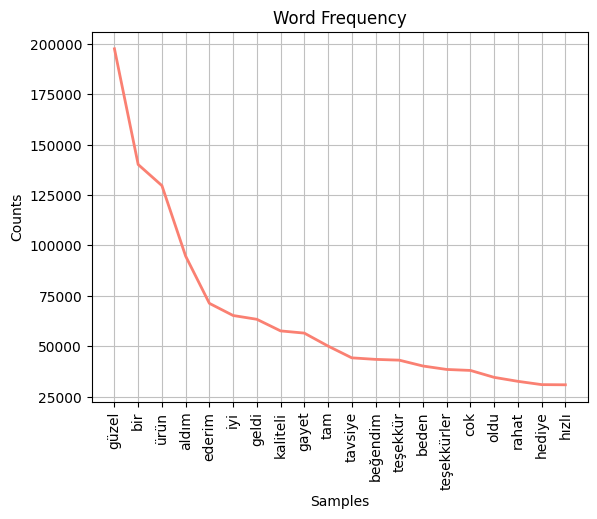

In [60]:
words_freq = nltk.FreqDist(all_words)
words_freq.plot(20, color='salmon', title='Word Frequency')

Yukarıdaki yorumlarda kullanılan kelimelerin frekansları (kullanım sıklıkları) gösterilmiştir. Güzel kelimesinin kullanım sıklığına bakarsak yorumların hemen hemen olumlu olduğu görebiliriz ki zaten değerlendirme puanları da bunu anlatıyor. Kaliteli, tavsiye ve hızlı gibi kelimelerin kargoların hızına, insanların ürünlerin kalitesini beğendiğine dair bir işaret diye düşünüyorum. Tavsiye ise daha önemli kullanıcılar ürünleri diğerlerine yani potansiyel alıcılara da tavsiye ediyorlar. Fakat bu kelime bazlı bir analiz bunun yanı sıra Bigram yaparak bu kelimelerin genellikle olumluya mı olumsuza mı yol açtığını görebiliriz.

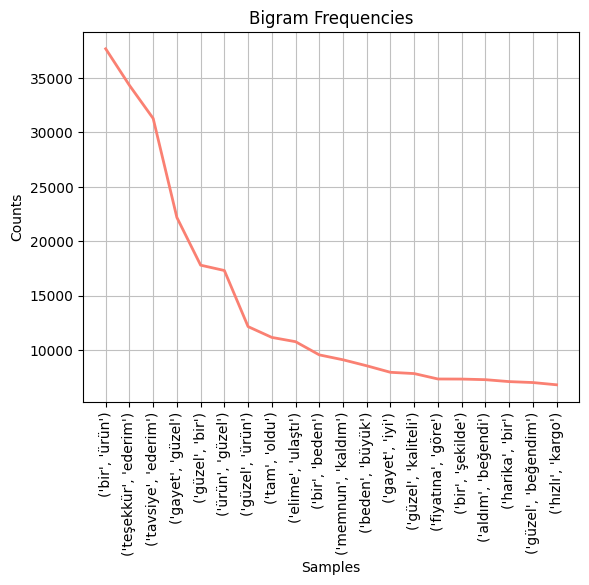

In [61]:
bigram = list(nltk.bigrams(all_words))
bigram_freq = nltk.FreqDist(bigram)
bigram_freq.plot(20, color = 'salmon', title = 'Bigram Frequencies')

Bigramları incelediğimizde ise, yukarıda belirttiğimiz kelimelerin olumluya çıktığını söyleyebiliriz. Özellikle tavsiye ederim bigramı kendisine ilk sıralarda yer bulmuş bunun yanı sıra hızlı kargo, güzel ürün ve memnun kaldım bigramları da yorumların genellikle olumlu yönde olduğunu dil bakımından açıklıyor. Keza zaten istatistiksel olarak yorumların çoğunlukla olumlu olduğunu biliyoruz.

In [62]:
!pip install wordcloud -qqq

(-0.5, 399.5, 199.5, -0.5)

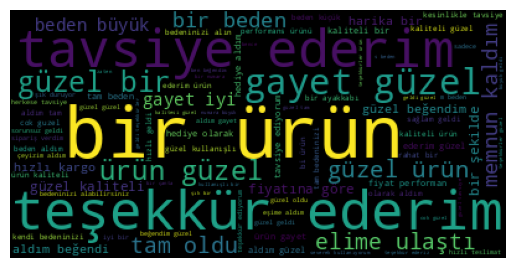

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wc_text = ' '.join(word for word in all_words)
wc = WordCloud().generate(wc_text)
plt.imshow(wc)
plt.axis('off')

In [64]:
all_questions_words = []

for qas in list(new_df['questions_answers'].values):
    for qa in qas:
        content = clean_text(qa['question'])
        for word in list(word_tokenize(content)):
            all_questions_words.append(word)

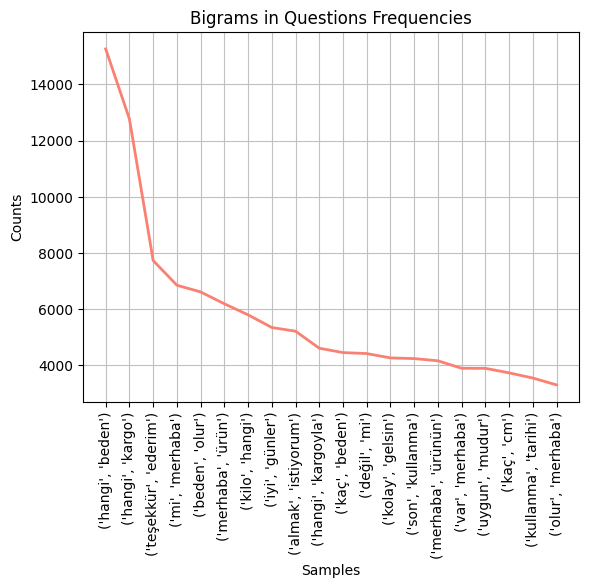

In [65]:
qa_bigram = list(nltk.bigrams(all_questions_words))
qa_bigram_freq = nltk.FreqDist(qa_bigram)
qa_bigram_freq.plot(20, color = 'salmon', title = 'Bigrams in Questions Frequencies')

Soru kalıplarına baktığımızda ise genelde kargo, beden, renk veya uzunluk gibi kelimeleri görüyoruz. Sorular çoğunlukla ürünün özellikleri ve kargolamasıyla alakalı gelmiş. Trendyol en temelde ürünün özellikleri alakalı bilgileri websitede veya uygulamada gösteriyor olsa da yine de kullanıcıların bu konular hakkında sık sık soru sorması ve soru-cevap sürecinin satın alımı uzatması veya aksatması bir problemi işaret ediyor. Kargo bilgileri ve Ürün Özellikleri her türden/segmentten kullanıcının anlayabileceği ve erişlebilir, kolay görülebilir/farkedilebilir olmalıdır.

In [66]:
negative_comments = []
positive_comments = []

for comments in list(new_df['comments'].values):
    for comment in comments:
        if int(comment['rate']) <= 2:
            negative_comments.append(comment['comment'])
        if int(comment['rate']) >= 4:
            positive_comments.append(comment['comment'])

In [67]:
negative_comments_words = []

for comment in negative_comments:
    text = clean_text(comment)
    for word in list(word_tokenize(text)):
        negative_comments_words.append(word)

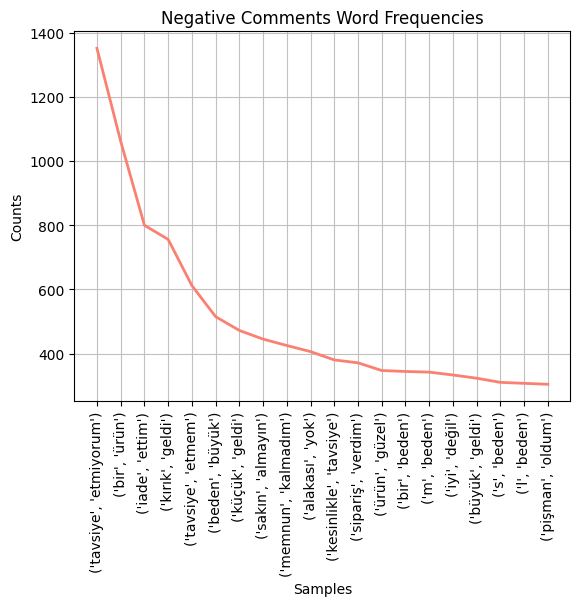

In [68]:
neg_words_bigram = list(nltk.bigrams(negative_comments_words))
neg_words_bigram_freq = nltk.FreqDist(neg_words_bigram)
neg_words_bigram_freq.plot(20, color = 'salmon', title = 'Negative Comments Word Frequencies')

2 puan ve daha aşağısında değerlendirme alan negatif yorumları Bigram olarak incelediğimizde tavsiye etmeme, iade etme ve pişman olma gibi eylem belirten bigramlar ve kırık geldi, alakası yok, iyi değil ve büyük/küçük geldi gibi neden belirten bigramları görüyoruz. Fakat arada ürün güzel gibi garip bir bigram da mevcut bu da yorumları değerlendirirken genellikle olsa da tam anlamıyla değerlendirme puanlarına neden güveneyeceğimizin kanıtı.

In [69]:
best_10_product_positive = 0
best_10_product_negative = 0

In [70]:
!pip install huggingface -qqq
!pip install transformers -qqq

In [71]:
from transformers import pipeline
pipe = pipeline("text-classification", model="savasy/bert-base-turkish-sentiment-cased")

In [72]:
best_10_product_comments = []
best_10_df = new_df.sort_values('rating_count', ascending = False).head(10)

for comments in list(best_10_df['comments'].values):
    for comment in comments:
        best_10_product_comments.append(clean_text(comment['comment']))

In [73]:
for comment in best_10_product_comments:
    sentiment = pipe(str(comment))
    sentiment = sentiment[0]['label']
    
    if sentiment == 'positive':
        best_10_product_positive += 1
    if sentiment == 'negative':
        best_10_product_negative += 1
    else:
        pass

In [74]:
best_10_product_positive, best_10_product_negative

(261, 239)

En yüksek satın alma hacmine sahip 10 ürüne ait veriseti içerisinde bulunan yorumları puanları bakımından değil text sentiment analizi yaptığımızda 500 toplam yorumun 261'i pozitif 239'u negatif yani değerler birbirlerine çok yakın. Ama sentiment modellerinin eğitildiği veri seti ve eğitim şeklini ve modelin kapasitesinin yaratacağı hata payları da göz önüne alınmalıdır ki önemli bir paydır.

In [75]:
negative_comments_dict = []

for comment in negative_comments:
    negative_comments_dict.append({
        'comment':comment,
        'label':'negative'
    })
    
negative_comments_df = pd.DataFrame(negative_comments_dict)

positive_comments_dict = []

for comment in positive_comments:
    positive_comments_dict.append({
        'comment':comment,
        'label':'positive'
    })
    
positive_comments_df = pd.DataFrame(positive_comments_dict)


In [76]:
negative_comments_df.to_csv('negative_comments.csv', index = False)
positive_comments_df.to_csv('positive_comments.csv', index = False)